# Gas Storage Valuation


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

BASE_DIR = Path('..').resolve()
DATA_RAW = BASE_DIR / 'data' / 'raw'
RESULTS = BASE_DIR / 'results'
RESULTS.mkdir(parents=True, exist_ok=True)
print('BASE_DIR:', BASE_DIR)

BASE_DIR: C:\Users\dappy\Downloads\Public-portfolio\Energy\gas_storage_valuation


In [2]:
import sys

# notebook add-on, to find repo root by walking up until we see src
p = Path().resolve()
while p != p.parent and not (p / "src").exists():
    p = p.parent

sys.path.insert(0, str(p))
print("Added to path:", p)


Added to path: C:\Users\dappy\Downloads\Public-portfolio\Energy\gas_storage_valuation


## Simulated price paths 
Monte Carlo paths fed into the storage optimiser.

In [3]:
from src.price_models import fit_ou_params, build_seasonal_theta, simulate_ou_paths

spot = pd.read_csv(DATA_RAW / 'spot_history_ttf_like.csv', parse_dates=['date']).sort_values('date')
#spot["date"] = pd.to_datetime(spot["date"])
dates = pd.DatetimeIndex(spot["date"])
theta = build_seasonal_theta(dates)

logp = np.log(spot["spot_eur_mwh"]).dropna()
params = fit_ou_params(logp)

n_days = 365
n_paths = 200

paths = simulate_ou_paths(
    s0=float(spot["spot_eur_mwh"].iloc[-1]),
    params=params,
    n_days=n_days,
    n_paths=n_paths,
    seed=42,
    seasonal_theta=theta.iloc[:n_days]   # must be length == n_days
)

paths.shape


(365, 200)

In [4]:
paths.iloc[:5, :5]

,path_0000,path_0001,path_0002,path_0003,path_0004
0,27.766001,27.766001,27.766001,27.766001,27.766001
1,28.323569,26.254484,29.044790,29.357963,24.939240
2,28.943411,28.508410,29.266263,30.518265,22.286784
3,28.723596,28.901106,30.728158,29.915357,23.037817
4,29.646505,28.045283,33.092444,28.942938,22.305114


### Sanity plots

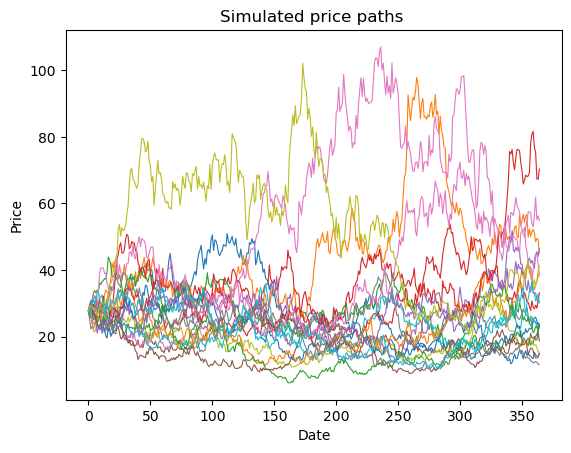

In [5]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(min(20, paths.shape[1])):
    plt.plot(paths.index, paths.iloc[:, i], linewidth=0.8)
plt.title('Simulated price paths ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()